In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import plotly
from plotly.subplots import make_subplots
from chart_studio import tools
import chart_studio.plotly as py
import plotly.graph_objs as go

# Plot query results

In [2]:
df = pd.read_csv('/Users/chenxian/Desktop/results.csv')

In [3]:
df.columns = ['stocks','high','hour']

In [4]:
df.head()

,stocks,high,hour
0,BYND,137.970001,9
1,BYND,139.559998,10
2,BYND,141.000000,11
3,BYND,138.240005,12
4,BYND,137.789902,13


In [5]:
stock_name = list(df['stocks'].unique())

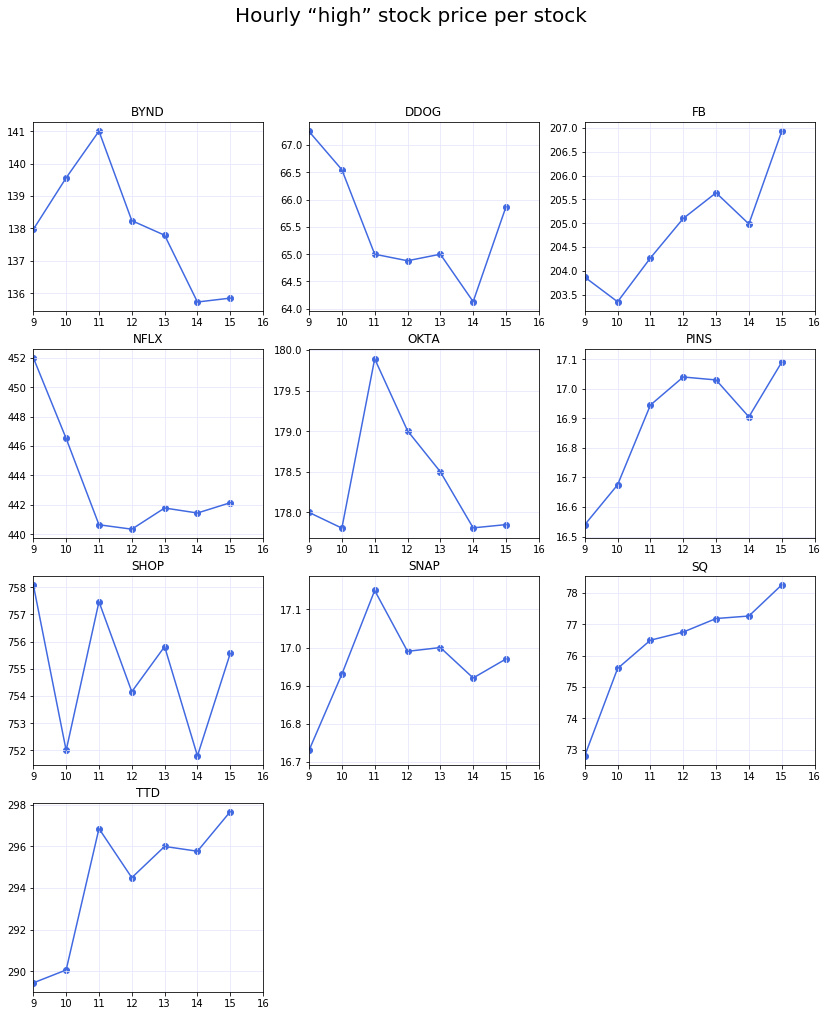

In [6]:
ncol = 3
row = 4
plt.subplots(figsize=(14,row*4))
plt.suptitle('Hourly “high” stock price per stock',fontsize=20)

for i,v in enumerate(stock_name):    
    plt.subplot(row, ncol, i+1)    
    plt.scatter(df.loc[df['stocks']==v,]['hour'],df.loc[df['stocks']==v,]['high'],color = 'royalblue')
    plt.plot(df.loc[df['stocks']==v,]['hour'],df.loc[df['stocks']==v,]['high'],color ='royalblue' )
    plt.grid(b=True, which='major', color='lavender', linestyle='-')
    plt.xlim((9, 16))
    plt.title(v)

plt.show()

# Interactive Candlestick Chart

In [7]:
trace = {}
for i in stock_name:
    d1=yf.download(tickers =i, start="2020-05-14", end="2020-05-15", interval = "1m")
    trace['trace'+str(i)]=go.Ohlc(x=d1.index,
                                  open = d1['Open'],
                                  high=d1['High'],
                                  low = d1['Low'],
                                  close = d1['Close'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
plotly.offline.init_notebook_mode(connected=True)


fig=make_subplots(rows=5,cols=2,subplot_titles=('BYND', 'DDOG', 'FB', 'NFLX', 'OKTA', 'PINS', 'SHOP', 'SNAP', 'SQ', 'TTD'))

i = 0
for r in range(1,6):
    for c in range(1,3):
        fig.append_trace(trace['trace'+stock_name[i]], r, c)
        i += 1
        


fig['layout'].update(height=800, width=1000, title='Candlestick Charts',
                     xaxis = dict(rangeslider = dict(visible = False)),
                     xaxis2 = dict(rangeslider = dict(visible = False)),
                     xaxis3 = dict(rangeslider = dict(visible = False)),
                     xaxis4 = dict(rangeslider = dict(visible = False)),
                     xaxis5 = dict(rangeslider = dict(visible = False)),
                     xaxis6 = dict(rangeslider = dict(visible = False)))

fig.update_layout(xaxis_rangeslider_visible=False)
plotly.offline.iplot(fig)
fig.show()